Assignment for Clinton Boyda

# K-NearestNeighbour (KNN)

For the first lab activity we will be using a dataset which contains the chemical compositions of different wines. More information about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/wine. This dataset is built-in the scikit-learn library and we can load it directly from there. Recall that KNNs are used for classification predictions based on the 'closeness' of our input to other datapoints. KNNs use distance metrics such as euclidean, manhattan, jaccard, etc; with **euclidean** being the most widely used and the default metric in the scikit-learn library.

Familiarize yourself with these imports as you will be using them a lot in your ML journey.

#### Loading libraries

In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a KNN model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

#### Understanding the dataset

In [ ]:
#loading data
wine = load_wine()

In [ ]:
# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
#(2) The target classes(y). The wines are placed into three classes.
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#(3) The feature names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

##### This is how the data looks like in a pandas dataframe

In [ ]:
df = pd.DataFrame(wine.data, columns=wine['feature_names'])
#df = pd.DataFrame(X, columns=wine['feature_names'])

df['class'] = wine.target
#df['class'] = y

print("Number of rows in the data: " + str(df.shape[0]))
df.head()

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### Observing the statistics of our data 

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


(Note the max, min and std values for each column)

In [ ]:
#confirm there are is no missing data
df.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Lab Activity One: Simple K-NN Model

> [AX] indicates an activity to be answered.

In [ ]:
#number of rows in dataframe
df.shape[0]

178

In [ ]:
#list type of panda datatypes
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int64
dtype: object

##### [A1] Split your data into training and testing. Use ``X_train``, ``y_train``,``X_test`` and ``y_test`` as the assigned variables respectively.

In [ ]:
#from Lab L3-1
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
  model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

##### [A2] Instantiate model using the default settings

In [ ]:
from  sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)


##### [A3] Fit the model

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

##### [A4] Predict on your test data

In [ ]:
yhat_test = knn.predict(X_test)
yhat_test

array([2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1])

##### [A5] Evaluate model performance using the ``accuracy_score()`` function

From L3-1
* $\hat{y}\gets predict(\mathbf{x'}, \mathbf{w})$,



where $\mathbf{X}$ are training data points, $\mathbf{y}$ are training labels, $\mathbf{\xi}$ are hyperparameters, $\mathbf{w}$ is the set of parameters which is the result of training and $\mathbf{x'}$ is the new point to be predicted (using the weights that were found in training). 

We can also have a multiple-predicting $predict$ function:
* $\mathbf{\hat{y}}\gets predict(\mathbf{X'}, \mathbf{w})$.

In [ ]:
#from L3-3 
display("Accuracy score in range of 0 (bad) to 1 (good).")
display("y^ Training score:")
from sklearn.metrics import accuracy_score 

yhat_train = knn.predict(X_train)
accuracy_score(y_train, yhat_train)

'Accuracy score in range of 0 (bad) to 1 (good).'

'y^ Training score:'

1.0

In [ ]:
display("Accuracy score in range of 0 (bad) to 1 (good).")
display("y^ Testing score:")
knn_accuracy = accuracy_score(y_test, yhat_test)
knn_accuracy

'Accuracy score in range of 0 (bad) to 1 (good).'

'y^ Testing score:'

0.7796610169491526

##### [A6] Evaluate model performance using the ``classification_report()`` function

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
#L3-3
from sklearn.metrics import classification_report
print("On training data:")
print(classification_report(y_train, yhat_train))
print("On test data:")
print(classification_report(y_test, yhat_test))
#print(classification_report(y_test, yhat_pid_test, \
#                           target_names=['No Diabetes', 'Diabetes']))

On training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        33

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

On test data:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.82      0.75      0.78        24
           2       0.71      0.67      0.69        15

    accuracy                           0.78        59
   macro avg       0.77      0.77      0.77        59
weighted avg       0.78      0.78      0.78        59



In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Granted you successfully fit and predicted a knn classifier on the wine dataset, you will notice the performance of the model is not great. Going back to the statistics of our dataset (the ``df.describe()`` function above) 
 - observe the standard deviation of the ``proline`` column. The range of the proline values are siginificantly different that the rest of the dataset (high std). 
 - observe the min and max of the ``nonflavanoid_phenols`` column. These values are all between 0 and 1 (percentage) while rest of the data is not.
 
These non-standarized values affect our model fitting and predictions. Recall that the KNN algorithm uses distance measures to classify similar elements, since some of the feature's values are on a different scale we must **normalize** this dataset. 

In [ ]:
#look at all columns for standard deviation
df.describe(include='all').loc['std']

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
class                             0.775035
Name: std, dtype: float64

In [ ]:
#look at all columns for standard deviation
df.describe(include='all').loc[['min','max']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0,0.0
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0,2.0


In [ ]:
#or in python3 df.agg(['min', 'max'])


##### Normalizing your dataset using the ``StandardScaler()`` function and fitting it to your data (normalizing both the ``X_train`` and ``X_test`` values).

In [ ]:
#Transform data
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### [A7] Instantiate a new KNN model (``model_2``), fit, predict and evaluate your accuracy again.

In [ ]:
knn_model2 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model2.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
display("Accuracy score in range of 0 (bad) to 1 (good).")
display("knn_model2 y^ Testing score:")
yhat_test = knn_model2.predict(X_test)
knn_model2_accuracy = accuracy_score(y_test, yhat_test)
knn_model2_accuracy


'Accuracy score in range of 0 (bad) to 1 (good).'

'knn_model2 y^ Testing score:'

0.9661016949152542

In [ ]:
display ("vs knn y^ Testing score: " + str(knn_accuracy))

'vs knn y^ Testing score: 0.7796610169491526'

There is now a drastic increase in accuracy from knn to knn_model_2!

### Lab Activity Two: Changing the K values

Initially we did not assign any parameters when instantiating the KNN classifer (``model = KNeighborsClassifier()``). The most important parameter to set is the ``K`` value. Recall the ``K`` in the KNN algorithm represents the number of nearest neighbours. So if the value of ``K`` is 3, it means that the 3 nearest neighbours are considered for computation.

In [ ]:
k_list = [1,2,3,4,6,8,12,15,20,25]
accuracy_scores_list = []

##### [A8] Using a for loop, iterate through the ``k_list`` above and instantiate (using a different ``K`` everytime), fit, predict and evaluate the models. Store the accuracy results in the ``accuracy_scores_list``.

In [ ]:
for k in k_list:
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  fit = knn.fit(X_train, y_train)
  yhat_test = knn.predict(X_test)
  accuracy_scores_list.append(accuracy_score(y_test, yhat_test))

accuracy_scores_list # output new list

[0.9661016949152542,
 0.9491525423728814,
 0.9661016949152542,
 0.9661016949152542,
 0.9491525423728814,
 0.9491525423728814,
 0.9491525423728814,
 0.9661016949152542,
 0.9661016949152542,
 0.9661016949152542]

##### [A9] Plot a graph of the ``K`` values vs its respective accuracy score.

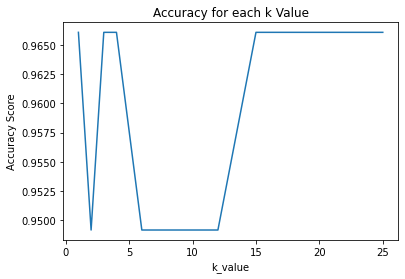

In [ ]:
plt.plot(k_list, accuracy_scores_list)
plt.title("Accuracy for each k Value")
plt.xlabel('k_value')
plt.ylabel('Accuracy Score')
plt.show()

#### Discussion 

##### [A10] Are any of the K-values causing overfitting? What ``K`` value did you find the most optimal?

From the graph k=5 shows as best with this data.  We don't know exact optimal since we have not tried every value of k (mathematically).